In [1]:
pip uninstall scikit-learn imbalanced-learn -y

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: imbalanced-learn 0.13.0
Uninstalling imbalanced-learn-0.13.0:
  Successfully uninstalled imbalanced-learn-0.13.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U scikit-learn imbalanced-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a1/a6/c5b78606743a1f28eae8f11973de6613a5ee87366796583fb74c67d54939/scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/9d/41/721fec82606242a2072ee909086ff918dfad7d0199a9dfd4928df9c72494/imbalanced_learn-0.13.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)


In [3]:
import pandas as pd
from imblearn.over_sampling import SMOTE
df=pd.DataFrame({'Age':[22,25,27,28,30,35,40,45,50,55,60,65,70],
                 'Income':[2000,2500,2700,320,3500,3800,4000,4200,4300,4500,5000,5500,6000],
                 'Class':['Minority','Majority','Majority','Majority','Majority','Minority','Minority','Minority','Majority','Majority','Majority','Majority','Majority']
                })
print(df)

    Age  Income     Class
0    22    2000  Minority
1    25    2500  Majority
2    27    2700  Majority
3    28     320  Majority
4    30    3500  Majority
5    35    3800  Minority
6    40    4000  Minority
7    45    4200  Minority
8    50    4300  Majority
9    55    4500  Majority
10   60    5000  Majority
11   65    5500  Majority
12   70    6000  Majority


**What is Feature Selection?**
 
        Feature selection is the process of choosing the most important features (variables) from a dataset to improve a machine learning model's performance and efficiency. Instead of using all the features, we select only the most relevant ones that contribute significantly to predictions.

**Why Do We Need Feature Selection?**
 
*1.Reduces Overfitting 📉*
 
        Too many irrelevant features can make a model complex and cause it to overfit the training data.

*2.Improves Model Performance 🚀*
 
        Selecting relevant features boosts accuracy and reduces unnecessary noise in the data.

*3.Reduces Training Time ⏳*
 
        Fewer features mean faster model training and lower computational cost.

*4.Enhances Interpretability 🔍*
 
        Helps in understanding which features actually impact predictions.
 

**Types of Feature Selection Methods**
 
<ins>*Type => Filter Methods:*</ins>
 
Method => Correlation, Chi-Square, Mutual Information.
 
Description => Rank features based on statistical tests.
 
<ins>*Type => Wrapper Methods:*</ins>
 
Method => Forward/Backward Selection, Recursive Feature Elimination (RFE)
 
Description => Train models with different feature subsets and select the best.
 

<ins>*Type => Embedded Methods*</ins>
 
Method =>Lasso Regression, Decision Trees
 
Description =>Feature selection is built into the model training process.

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
np.random.seed(42)
data=pd.DataFrame({
    'Size':np.random.randint(1000,5000,100),
    'Bedrooms':np.random.randint(1,5,100),
    'Age':np.random.randint(1,50,100),
    'Price':np.random.randint(100000,500000,100)
})
print(data)

    Size  Bedrooms  Age   Price
0   4174         2   32  486393
1   4507         2   39  134754
2   1860         4   49  326814
3   2294         2   32  337714
4   2130         2    4  242483
..   ...       ...  ...     ...
95  2129         2   16  469599
96  4843         4   29  236672
97  4893         1    3  325732
98  2500         3   20  455323
99  1702         3   36  271836

[100 rows x 4 columns]


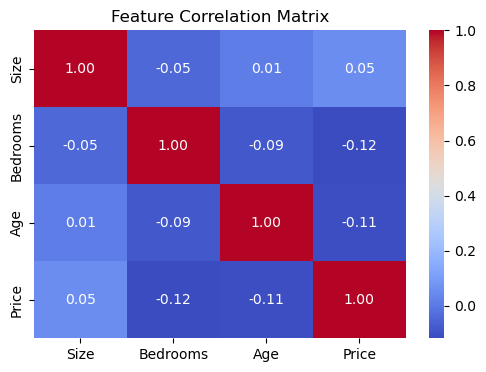

In [8]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

In [13]:
#step3:apply RFE
x=data.drop(columns=['Price'])
y=data['Price']

model=RandomForestRegressor()
rfe=RFE(model,n_features_to_select=2)
x_selected=rfe.fit_transform(x,y)

print("selected features using RFE:",x.columns[rfe.support_])

#apply RFE(wrapper method) to select the top 2 important features


selected features using RFE: Index(['Size', 'Age'], dtype='object')


In [11]:
#step4:apply Lasso(least absolute shrikage and selection operator) Regresssion
lasso=Lasso(alpha=0.1)
lasso.fit(x,y)
importance=np.abs(lasso.coef_)

#display feature importance
selected_features=x.columns[importance>0]
print("selected features using lasso:", selected_features)

#apply lasso regression to eliminate irrelevant features

selected features using lasso: Index(['Size', 'Bedrooms', 'Age'], dtype='object')
